## Part 1. Description of more realistic dataset

Written by Sundong Kim (sundong.kim@kaist.ac.kr), Jan 11th, 2019,

In this notebook, we introduce the description of our more realistic benchmark dataset.

* First, we briefly introduce how to generate the new dataset.
    * Step 1: http://143.248.84.89:8888/notebooks/revisit/notebook_prepare_open_dataset/Preparing-open-dataset_step1_store_A.ipynb
    * Step 2: http://143.248.84.89:8888/notebooks/revisit/notebook_prepare_open_dataset/Preparing-open-dataset_step2_store_A.ipynb
* Second, we show brief statistics of the new dataset.
* Third, we show the difference between train/test ratio of our old dataset and our new dataset and compare between two dataset according to realistic prediction setting.

In [1]:
import pandas as pd
import numpy as np
import os
import random
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# In this tutorial, we will use a store_E dataset.      # /data: 50,000 user dataset  /data_sample: 500 user sample dataset
pre_release_path = '../data/indoor/store_E/'

# Load dataset
train_labels = pd.read_csv(pre_release_path+'train_labels.tsv', sep='\t')
test_labels = pd.read_csv(pre_release_path+'test_labels.tsv', sep='\t')
train_visits = pd.read_csv(pre_release_path+'train_visits.tsv', sep='\t')
test_visits = pd.read_csv(pre_release_path+'test_visits.tsv', sep='\t')
wifi_sessions = pd.read_csv(pre_release_path+'wifi_sessions.tsv', sep='\t')

### 1. Exploring dataset

In [3]:
train_labels.head(5)

,visit_id,revisit_interval,revisit_intention
0,v0,NaN,0
1,v1,NaN,0
2,v2,NaN,0
3,v3,NaN,0
4,v4,NaN,0


In [4]:
train_visits.head(5)

,visit_id,wifi_id,date,indices
0,v0,1,17312,991737
1,v1,5,17254,609301
2,v2,6,17204,259568;259572;259584;259586;259587;259591;259599
3,v3,7,17321,1058746;1058752;1058754
4,v4,8,17249,572725;572758;572763;572783;572793;572810;5728...


In [5]:
test_labels.head(5)

,visit_id,revisit_interval,revisit_intention
0,v50924,NaN,0
1,v50925,NaN,0
2,v50926,NaN,0
3,v50927,NaN,0
4,v50928,NaN,0


In [6]:
test_visits.head(5)

,visit_id,wifi_id,date,indices
0,v50924,2,17466,1954293;1954298;1954332;1954347;1954359;195436...
1,v50925,3,17474,2007232;2007427;2007433;2007438;2007446;200745...
2,v50926,4,17364,1353741;1353747;1353748;1353752;1353760;1353771
3,v50927,7,17381,1466194;1466229;1466235
4,v50928,9,17469,1979650


In [7]:
wifi_sessions.head(5)

,index,wifi_id,ts,area,dwell_time
0,0,36441,1483217853,out,4680
1,1,36441,1483217853,max,59609
2,2,40025,1483219553,out,3
3,3,40025,1483219554,max,201
4,4,20473,1483230555,out,46210


**Some statistics**

In [8]:
# Number of unique users

print(len(train_labels),len(train_visits),len(test_labels),len(test_visits),len(wifi_sessions))

50924 50924 22856 22856 1620396


In [9]:
# Number of unique users

len(set(train_visits.wifi_id)), len(set(test_visits.wifi_id)) 

(32241, 22856)

In [10]:
# Revisit ratio == Main difference (Here we cut by time - so the ratio between train/test are different.)



print(train_labels.revisit_intention.value_counts())
print()
print(test_labels.revisit_intention.value_counts())
print('Revisit ratio of training dataset is {:.3f}, test dataset is {:.3f}'.format(sum(train_labels.revisit_intention)/len(train_labels.revisit_intention),
                                                                               sum(test_labels.revisit_intention)/len(test_labels.revisit_intention)))

0    32240
1    18684
Name: revisit_intention, dtype: int64

0    17510
1     5346
Name: revisit_intention, dtype: int64
Revisit ratio of training dataset is 0.367, test dataset is 0.234


Mean revisit interval of training dataset is 30.822, test dataset is 30.571


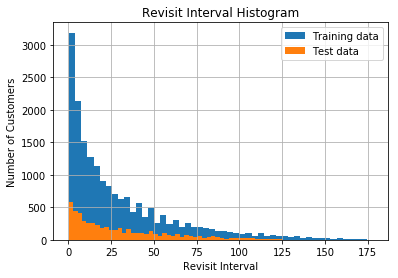

In [11]:
# Revisit interval - train data - among users who revisit
train_labels.revisit_interval.hist(bins=50)

# Revisit interval - test data - among users who revisit
test_labels.revisit_interval.hist(bins=50)

plt.xlabel('Revisit Interval')
plt.ylabel('Number of Customers')
plt.title('Revisit Interval Histogram')
plt.legend(['Training data','Test data'])

print('Mean revisit interval of training dataset is {:.3f}, test dataset is {:.3f}'.format(np.mean(train_labels.revisit_interval), np.mean(test_labels.revisit_interval)))

In [12]:
# relative date to actual date example
from datetime import date, timedelta

d0 = date(1970, 1, 1)
delta = 14141
print(d0+timedelta(days=17167))

2017-01-01


We only deal with the first visits for prediction, that's why the number of customers decrease. Otherwise, the dataset suffers from leakage.


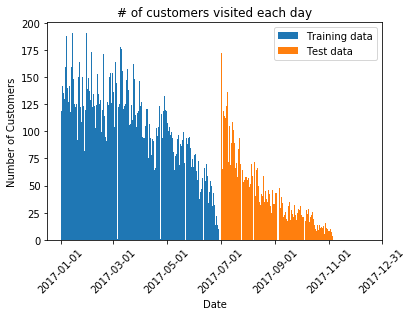

In [13]:
train_data = pd.concat([train_visits, train_labels[['revisit_interval','revisit_intention']]], axis=1)
train_data['date_str'] = train_data['date'].apply(lambda x: date(1970,1,1)+timedelta(days=x))
train_data1 = train_data[train_data.revisit_intention==1]
plt.hist(train_data1.date, bins=max(train_data.date)-min(train_data.date)+1)[2]
plt.title('# of customers visited each day');

test_data = pd.concat([test_visits, test_labels[['revisit_interval','revisit_intention']]], axis=1)
test_data1 = test_data[test_data.revisit_intention==1]
plt.hist(test_data1.date, bins=max(test_data.date)-min(test_data.date)+1)[2]
xdate = [17167,17226,17287,17348,17410,17471,17531]
xlabel = [date(1970,1,1)+timedelta(days=x) for x in xdate]
plt.xticks(xdate, xlabel, rotation='45')
plt.title('# of customers visited each day');
plt.xlabel('Date');
plt.ylabel('Number of Customers');
plt.legend(['Training data', 'Test data']);
print('We only deal with the first visits for prediction, that\'s why the number of customers decrease. Otherwise, the dataset suffers from leakage.')

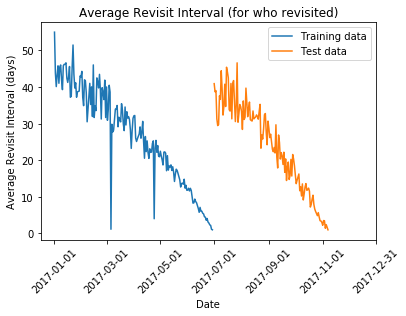

In [14]:
train_data1.groupby(['date'])['revisit_interval'].mean().plot()
test_data1.groupby(['date'])['revisit_interval'].mean().plot()

xdate = [17167,17226,17287,17348,17410,17471,17531]
xlabel = [date(1970,1,1)+timedelta(days=x) for x in xdate]
plt.xticks(xdate, xlabel, rotation='45')
plt.title('Average Revisit Interval (for who revisited)');
plt.xlabel('Date');
plt.ylabel('Average Revisit Interval (days)');
plt.legend(['Training data', 'Test data']);

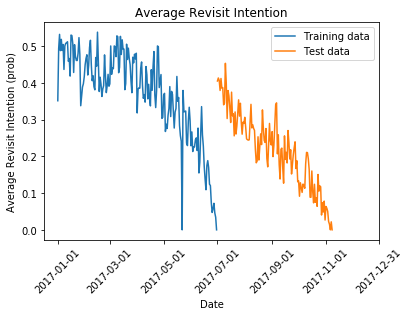

In [15]:
train_data.groupby(['date'])['revisit_intention'].mean().plot()
test_data.groupby(['date'])['revisit_intention'].mean().plot()

xdate = [17167,17226,17287,17348,17410,17471,17531]
xlabel = [date(1970,1,1)+timedelta(days=x) for x in xdate]
plt.xticks(xdate, xlabel, rotation='45')
plt.title('Average Revisit Intention');
plt.xlabel('Date');
plt.ylabel('Average Revisit Intention (prob)');
plt.legend(['Training data', 'Test data']);

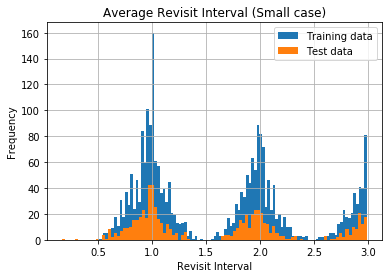

In [16]:
train_labels[train_labels.revisit_interval<3].revisit_interval.hist(bins=100)
test_labels[test_labels.revisit_interval<3].revisit_interval.hist(bins=100)
plt.title('Average Revisit Interval (Small case)');
plt.xlabel('Revisit Interval');
plt.ylabel('Frequency');
plt.legend(['Training data', 'Test data']);

In [17]:
# # Wifi session logs distribution by each month:
# #  - The number of logs from train period is larger than the number of logs from test period.
# #  - Since we only retain one indoor visit for each wifi-id in the test period.
# wifi_sessions.ts.hist(bins=12)

In [18]:
# Wifi session logs distribution by area
wifi_sessions.area.value_counts()

max             383343
out             246679
in               98104
center           66713
sensor19         53960
sensor5          53821
jk3              47290
sensor7          46611
sensor15         37132
indi-brand       36933
bcd              36860
indi-brand2      35916
ghi              34322
sensor10         32753
ef               30776
sensor17         29077
sensor14         28879
sensor16         27908
out2             27488
jk2              26602
sensor4          23939
jk               22906
sensor9          21830
out1             19824
sensor18         16266
sensor8          15312
sensor6          15193
sensor2          15180
sensor3          11518
ent2              9593
sensor1           9564
sensor12          8703
ent               8177
sensor11          7976
fitting-room      7121
sensor13          6158
counter           5383
fitting1          5044
fitting2          3426
k-fashion         3414
sensor20          2702
Name: area, dtype: int64

### 2. Feature generation

In [19]:
# In this tutorial, we will use a store_C dataset.      # /data: 50,000 user dataset  /data_sample: 500 user sample dataset
pre_release_path = '../data/indoor/store_C/'

# Load dataset
train_labels = pd.read_csv(pre_release_path+'train_labels.tsv', sep='\t')
test_labels = pd.read_csv(pre_release_path+'test_labels.tsv', sep='\t')
train_visits = pd.read_csv(pre_release_path+'train_visits.tsv', sep='\t')
test_visits = pd.read_csv(pre_release_path+'test_visits.tsv', sep='\t')
wifi_sessions = pd.read_csv(pre_release_path+'wifi_sessions.tsv', sep='\t')

wifi_sessions = wifi_sessions.set_index('index')

In [20]:
### Before feature engineering, querying some useful information from wifi-sessions data, and add to the dataframe.
import time
def add_infos(df):  
    tst = time.time()
    df['l_index'] = df['indices'].apply(lambda x: [int(y) for y in x.split(';')])
    t1 = time.time()
    print(t1-tst)
    
    newidx = [item for sublist in list(df.l_index) for item in sublist]
    tmpdf = wifi_sessions.loc[newidx]
    traj_lens = df.l_index.apply(len)

    tmp_areas = list(tmpdf['area'])
    tmp_dt = list(tmpdf['dwell_time'])
    tmp_ts_end = list(np.array(tmpdf['ts'])+np.array(tmp_dt))  # end time
    
    rslt_dt = []
    rslt_areas = []
    rslt_ts_end = []
    
    i = 0
    for x in traj_lens:
        rslt_dt.append(tmp_dt[i:i+x])
        rslt_areas.append(tmp_areas[i:i+x])
        rslt_ts_end.append(max(tmp_ts_end[i:i+x]))
        i += x
        
    df['dwell_times'] = rslt_dt
    df['areas'] =  rslt_areas
    df['ts_end'] = rslt_ts_end
    
    t2 = time.time()
    print(t2-t1)
    return df 
    
##### Very slow approach, so revised.    
#     df['dwell_times'] = df['l_index'].apply(lambda x: [wifi_sessions.loc[idx]['dwell_time'] for idx in x])
#     t2 = time.time()
#     print(t2-t1)
#     df['areas'] = df['l_index'].apply(lambda x: [wifi_sessions.loc[idx]['area'] for idx in x])
#     t3 = time.time()
#     print(t3-t2)
    return df

In [21]:
train_visits = add_infos(train_visits)
test_visits = add_infos(test_visits)

0.30609917640686035
1.0195403099060059
0.06485486030578613
0.17039918899536133


In [22]:
train_visits.dwell_times.head(3)

0                 [588, 15, 258]
1                [598, 297, 329]
2    [1060, 1000, 1064, 11, 126]
Name: dwell_times, dtype: object

In [23]:
### Sample code to generate features 

def statistical_feature_generator(x):
    fs = []

    total_dwell_time = sum(x['dwell_times'])   # total dwell time
    num_area_trajectory_have = len(x['dwell_times'])  # the number of area
    num_unique_area_sensed = len(set(x['areas']))  # the number of unique areas
    
    fs.append(total_dwell_time)
    fs.append(num_area_trajectory_have)  
    fs.append(num_unique_area_sensed)     
    
    return fs


def add_statistical_features(train_visits):
    df = train_visits.copy()
    
    features = df.apply(lambda x: statistical_feature_generator(x), axis=1)
    featureName = ['total_dwell_time', 'num_area', 'num_unique_area']
    
    fdf = pd.DataFrame(list(np.asarray(features)), index=features.index, columns = featureName)
    
    # Combine feature values to the dataframe
    df = pd.concat([df, fdf], axis=1)
    del fdf
    
    return df

In [24]:
train_visits = add_statistical_features(train_visits)
test_visits = add_statistical_features(test_visits)

In [25]:
train_visits['date_rel'] = train_visits['date']-min(train_visits.date)
test_visits['date_rel'] = test_visits['date']-min(train_visits.date)

In [26]:
train_visits.head(3)

,visit_id,wifi_id,date,indices,l_index,dwell_times,areas,ts_end,total_dwell_time,num_area,num_unique_area,date_rel
0,v0,1,17250,651212;651491;651499,"[651212, 651491, 651499]","[588, 15, 258]","[1f-nailstudio, 2f-body-care, 2f-hair-care]",1490433418,861,3,3,83
1,v1,1,17289,870490;870492;870497,"[870490, 870492, 870497]","[598, 297, 329]","[1f-enter, 1f-must, 1f-promo]",1493812118,1224,3,3,122
2,v2,1,17294,895551;895557;895558;895626;895627,"[895551, 895557, 895558, 895626, 895627]","[1060, 1000, 1064, 11, 126]","[1f-must, 1f-enter, 1f-promo, 1f-getitbeauty, ...",1494240628,3261,5,5,127


### 3. Revisit Prediction (Binary classification)

In [27]:
import time
import xgboost as xgb
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

def show_intention_classification_result(y_pred, y_test):
    return metrics.accuracy_score(y_test, y_pred)

def show_interval_regression_result(y_pred, y_test):
    return metrics.mean_squared_error(y_test, y_pred)

Downsampling for measuring binary classification accuracy

In [28]:
df_train = pd.concat([train_visits, train_labels[['revisit_intention','revisit_interval']]], axis=1)
df_test = pd.concat([test_visits, test_labels[['revisit_intention','revisit_interval']]], axis=1)

In [29]:
## Generate 'suppress_time' column for evaluation
def generate_suppress_time_col(df):
    last_ts_end = max(df['ts_end'])
    df['tmp_suppress_time'] = [(last_ts_end-x)/86400 for x in df['ts_end']]
    df['suppress_time'] = np.maximum(df['revisit_interval'].fillna(0), df['revisit_interval'].isnull()*df['tmp_suppress_time'])
    del df['tmp_suppress_time']
    return df
    
df_train = generate_suppress_time_col(df_train)
df_test = generate_suppress_time_col(df_test)

In [30]:
### Retain only feature values

def remove_unnecessary_features(df):
    unnecessary_attributes = ['visit_id', 'wifi_id', 'indices', 'l_index', 'dwell_times', 'areas', 'ts_end']
    all_attributes = list(df.columns)
    for attribute in unnecessary_attributes:
        try:
            all_attributes.remove(attribute)
        except:
            pass
    df = df[all_attributes]
    return df

df_train = remove_unnecessary_features(df_train)
df_test = remove_unnecessary_features(df_test)

In [31]:
def label_balancing(df, name_target_column):
    ## No downsampling
    return df
    
#     ## 1:1 Downsampling
#     minimum_label_num = list(df[name_target_column].value_counts())[-1]
    
#     df_list = []
#     for value in df[name_target_column].unique():
#         sub_dfs = df.loc[df[name_target_column] == value]
#         new_sub_dfs = sub_dfs.iloc[np.random.permutation(len(sub_dfs))][:minimum_label_num]  ## Random Downsampling according to smallest label size
#         df_list.append(new_sub_dfs)
#         del sub_dfs
        
#     new_df = pd.concat(df_list).sort_index()
    
#     return new_df

In [32]:
df_train.head(3)

,date,total_dwell_time,num_area,num_unique_area,date_rel,revisit_intention,revisit_interval,suppress_time
0,17250,861,3,3,83,1,39.10,39.10
1,17289,1224,3,3,122,1,4.95,4.95
2,17294,3261,5,5,127,1,0.66,0.66


In [33]:
1-sum(df_train.revisit_intention)/len(df_train.revisit_intention), 1-sum(df_test.revisit_intention)/len(df_test.revisit_intention)

(0.5183331907735296, 0.6201010195491534)

In [34]:
df_test['suppress_time'].head(5)

0    47.860000
1    75.028565
2     1.064664
3     3.560000
4    66.030000
Name: suppress_time, dtype: float64

In [35]:
import lifelines

print('-----------   Experiments Begin   -------------')
print()

clfs = [Pipeline([('classification', XGBClassifier(max_depth=5, learning_rate=0.1))]), 
                Pipeline([('regression', XGBRegressor(max_depth=5, learning_rate=0.1))]),
               ]

options = ['no_date', 'date']

rslt = {}
for opt in options:
    rslt[opt] = {}
    for clf in clfs:
        rslt[opt][clf] = {}
        rslt[opt][clf]['elapsed_time'] = []
        for metric in ['accuracy', 'precision_macro', 'recall_macro', 'fscore_macro', 'MSE', 'cindex']:
            rslt[opt][clf][metric] = []


## 나중에 더 정교화 (실제 cut-off point 가지고)
train_date_max = max(df_train.date)
test_date_max = max(df_test.date)
    
for i in range(2):
    for opt in ['no_date', 'date']:
        ## Making downsampled dataset for measuring binary classification accuracy - baseline = 0.5
        if opt == 'no_date':
            whole_balanced_train = label_balancing(df_train, 'revisit_intention')[df_train.columns.drop(['date','date_rel'])]
            whole_balanced_test = label_balancing(df_test, 'revisit_intention')[df_train.columns.drop(['date','date_rel'])]   
            
        if opt == 'date':
            whole_balanced_train = label_balancing(df_train, 'revisit_intention') 
            whole_balanced_test = label_balancing(df_test, 'revisit_intention')
    
        if (i == 0) and (opt == 'no_date'):
            print('Class label distribution after downsampling - Train data: revisit_intention 0: {}, 1: {}'.format(
                whole_balanced_train.revisit_intention.value_counts()[0],
                whole_balanced_train.revisit_intention.value_counts()[1]))
            print('Class label distribution after downsampling - Test data: revisit_intention 0: {}, 1: {}'.format(
                whole_balanced_test.revisit_intention.value_counts()[0],
                whole_balanced_test.revisit_intention.value_counts()[1]))


        for (train_data, test_data, ref) in [(whole_balanced_train, whole_balanced_test, 'Downsampled')]:
            train_array = np.asarray(train_data)  
            test_array = np.asarray(test_data)  

            for clf in clfs:
                if clf.steps[0][0] == 'classification':

                    # Dividing features and labels
                    X_train, y_train = train_array[:, :-3], train_array[:, -3].astype(int)
                    X_test, y_test = test_array[:, :-3], test_array[:, -3].astype(int)

                    # Training
                    start = time.time()
                    clf = clf.fit(X_train, y_train)

                    # Prediction
                    y_pred = clf.predict(X_test)

                    acc = metrics.accuracy_score(y_test, y_pred)
                    pm,rm,fm,_ = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')

                    rslt[opt][clf]['accuracy'].append(acc)
                    rslt[opt][clf]['precision_macro'].append(pm)
                    rslt[opt][clf]['recall_macro'].append(rm)
                    rslt[opt][clf]['fscore_macro'].append(fm)

                else:
                    # Dividing features and labels
                    X_train, y_train = train_array[:, :-3], train_array[:, -1]
                    X_test, y_test = test_array[:, :-3], test_array[:, -1]
                    y_test_bin = test_array[:,-3]
                    

                    # Training
                    start = time.time()
                    clf = clf.fit(X_train, y_train)

                    # Prediction
                    y_pred = clf.predict(X_test)
#                     mse = metrics.mean_squared_error(y_test, y_pred)

#                     y_test_max = max(y_test)
                    mse = metrics.mean_squared_error(y_test[y_test_bin == 1], y_pred[y_test_bin == 1])
                    
                    cindex = lifelines.utils.concordance_index(y_test, y_pred, event_observed= y_test_bin == 1 )

                    rslt[opt][clf]['MSE'].append(mse)
                    rslt[opt][clf]['cindex'].append(cindex)


                done = time.time()
                elapsed = done-start
                rslt[opt][clf]['elapsed_time'].append(elapsed)

print()
print('-----------   Performance of our model   -------------')
print()

    
for opt in options:
    print('Option: {}'.format(opt))
    for clf in clfs:
        for key in rslt[opt][clf].keys():
            if len(rslt[opt][clf][key]) > 0:
                print('Average {} (with {}): {:.4f}'.format(key, str(clf.steps[0][1])[:10], np.mean(rslt[opt][clf][key])))
    print()


-----------   Experiments Begin   -------------

Class label distribution after downsampling - Train data: revisit_intention 0: 36359, 1: 33787
Class label distribution after downsampling - Test data: revisit_intention 0: 13259, 1: 8123


/home/dmlab/ksedm1/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/dmlab/ksedm1/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



-----------   Performance of our model   -------------

Option: no_date
Average elapsed_time (with XGBClassif): 3.2769
Average accuracy (with XGBClassif): 0.6047
Average precision_macro (with XGBClassif): 0.5694
Average recall_macro (with XGBClassif): 0.5633
Average fscore_macro (with XGBClassif): 0.5634
Average elapsed_time (with XGBRegress): 3.0681
Average MSE (with XGBRegress): 1931.9485
Average cindex (with XGBRegress): 0.5733

Option: date
Average elapsed_time (with XGBClassif): 3.5139
Average accuracy (with XGBClassif): 0.6201
Average precision_macro (with XGBClassif): 0.3101
Average recall_macro (with XGBClassif): 0.5000
Average fscore_macro (with XGBClassif): 0.3828
Average elapsed_time (with XGBRegress): 3.9048
Average MSE (with XGBRegress): 852.6013
Average cindex (with XGBRegress): 0.5397



In [36]:
whole_balanced_train.tail(3)

,date,total_dwell_time,num_area,num_unique_area,date_rel,revisit_intention,revisit_interval,suppress_time
70143,17320,678,6,6,153,0,NaN,27.107234
70144,17215,2062,4,3,48,1,86.8,86.800000
70145,17302,114,3,3,135,0,NaN,45.356609


In [37]:
from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model
cph = CoxPHFitter()
# `event_col` refers to whether the 'death' events was observed: 1 if observed, 0 else (censored)
cph.fit(whole_balanced_train[whole_balanced_train.columns.drop(['revisit_interval'])], 
        'suppress_time', event_col='revisit_intention', show_progress=False)
cph.print_summary()

n=70146, number of events=33787

                    coef  exp(coef)  se(coef)       z      p  lower 0.95  upper 0.95     
date             -0.0419     0.9590 3330.9636 -0.0000 1.0000  -6528.6107   6528.5269     
total_dwell_time  0.0000     1.0000    0.0000  4.3593 0.0000      0.0000      0.0000  ***
num_area          0.0080     1.0081    0.0025  3.1626 0.0016      0.0030      0.0130   **
num_unique_area   0.0027     1.0027    0.0028  0.9532 0.3405     -0.0028      0.0081     
date_rel          0.0413     1.0422 3330.9636  0.0000 1.0000  -6528.5274   6528.6101     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.527
Likelihood ratio test = 552.896 on 5 df, p=0.00000


In [ ]:
test_pred = cph.predict_expectation(whole_balanced_test[whole_balanced_test.columns.drop(['revisit_interval','revisit_intention','suppress_time'])])
score_test = lifelines.utils.concordance_index(whole_balanced_test['suppress_time'], test_pred[0], event_observed=whole_balanced_test['revisit_intention'])
score_test

0.49857148231547277

In [ ]:
test_pred = cph.predict_median(whole_balanced_test[whole_balanced_test.columns.drop(['revisit_interval','revisit_intention','suppress_time'])])
score_test = lifelines.utils.concordance_index(whole_balanced_test['suppress_time'], test_pred[0.5], event_observed=whole_balanced_test['revisit_intention'])
score_test

In [ ]:
whole_balanced_test.head(3)   // 방문횟수같은 강한 feature 몇개 넣어보자.

In [ ]:
pd.concat([whole_balanced_test['suppress_time'], test_pred[0.5], whole_balanced_test['revisit_intention']],axis=1)